# Lab 03.1

## Overview

* Explore Qubits with Qiskit

### Depends On

* 01-setup

### Run time

30 min

### STEP 1. Pay attention to the imports

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

### STEP 2. Constructor quantum circuit and draw it

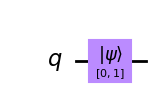

In [2]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

### STEP 3. Create the Qubit and display its state

In [3]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

### STEP 4. Get the state

In [4]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


### STEP 5. Display it

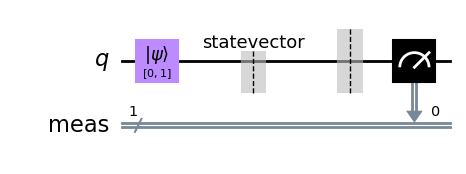

In [5]:
qc.measure_all()
qc.draw()

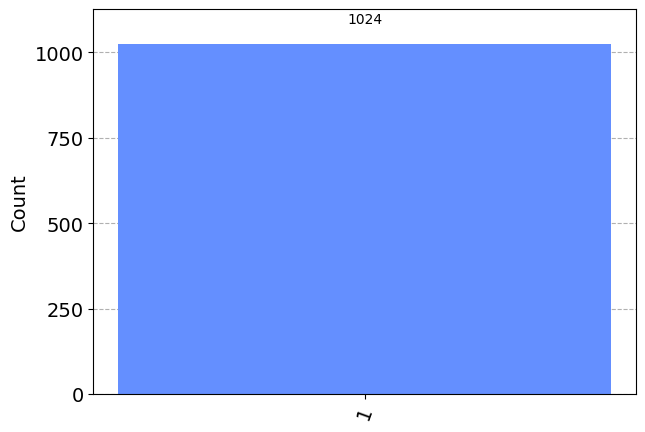

In [6]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

### STEP 6. Calculate initial state

In [7]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

### STEP 7. New state
* Repeat the steps for initialising the qubit as before:

In [8]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


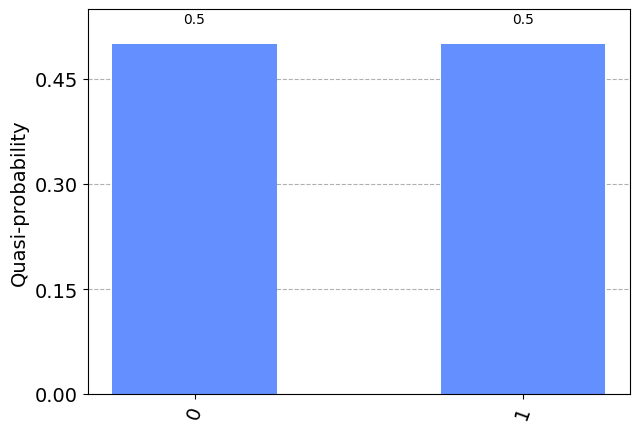

In [9]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

We can see we have equal probability of measuring either  
|
0
⟩
  or  
|
1
⟩
 . To explain this, we need to talk about measurement.





In [10]:
qc
vector = [1,1]
vector

[1, 1]

### This will give an error, because the vector is not normalized

In [11]:
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

### Quick Exercise 

1. Create a state vector that will give a 1/3 probability of measuring |0>
2. Create a different state vector that will give the same measurement probabilities.
3. Verify that the probability of measuring  |1>  for these two states is 2/3.

* You can check your answer in the widget below (accepts answers ±1% accuracy, you can use numpy terms such as 'pi' and 'sqrt()' in the vector):

In [12]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

### STEP 8. Demonstrate using Qiskit’s statevector simulator
* If you get an error when running the second time, see below

In [19]:
#qc.save_statevector()
#result = sim.run(assemble(qc)).result()
#state = result.get_statevector()
#print("Qubit State = " + str(state))

### STEP 9. Create a circuit where we measure this qubit

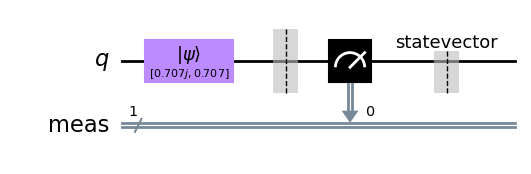

In [20]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw()

### STEP 10. Simulate this entire circuit
* Do it a few times

In [21]:
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


### STEP 11. You can also try this interactive Bloch sphere demo.

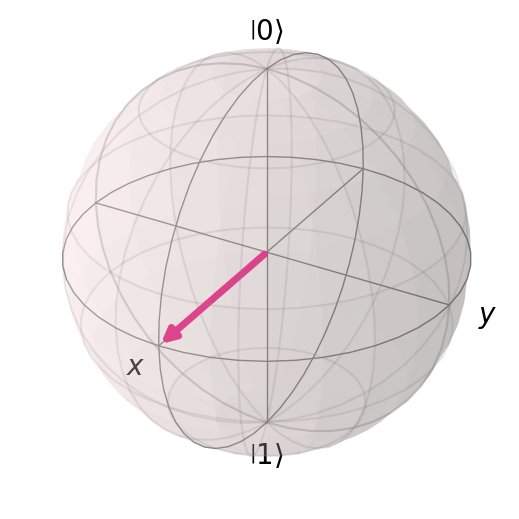

In [22]:
from qiskit.visualization import plot_bloch_vector
coords = [1,pi/2,0]  # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')

### Quick exercise 
* Use plot_bloch_vector() to plot a qubit in the states:

![](fivequbits.png)